In [15]:
import numpy as np
import matplotlib.pyplot as plt
from model import get_default_single_pipeline_model
from matplotlib import cm
from matplotlib import ticker

plt.rcParams["font.family"] = "Times New Roman"

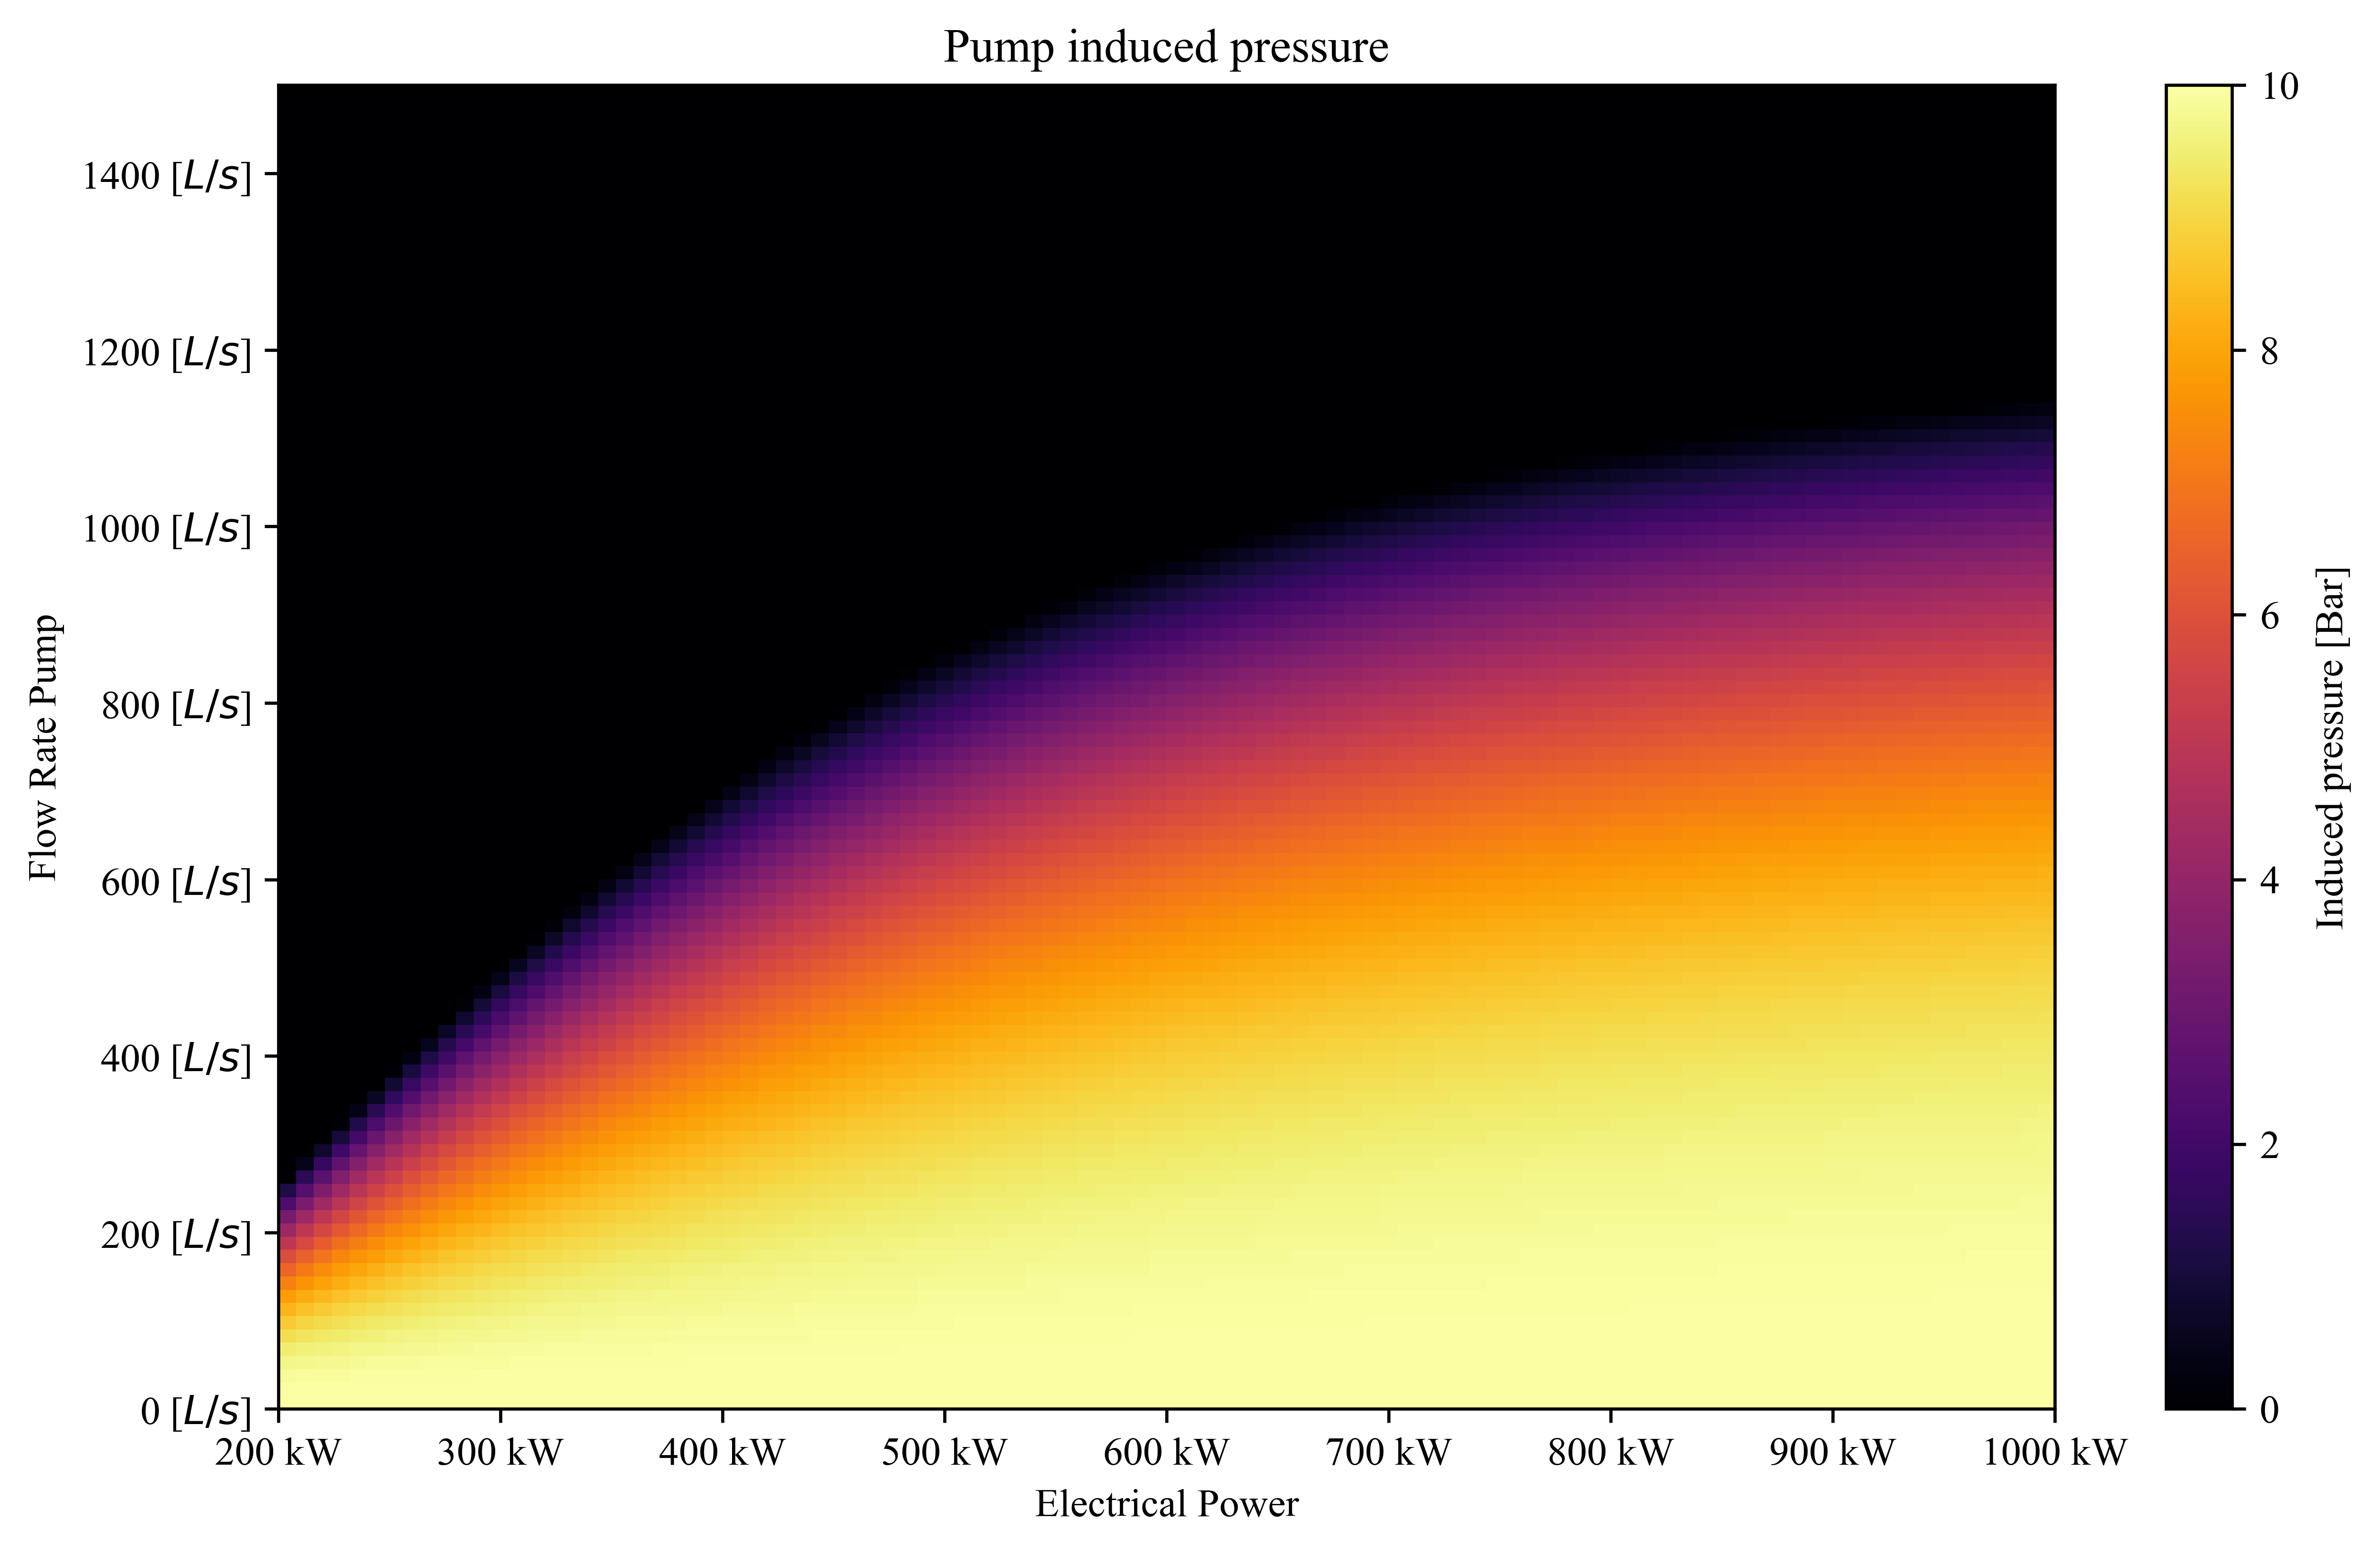

In [16]:
def plot_pump_characteristics():
    model = get_default_single_pipeline_model()
    
    powers = np.linspace(model.min_power, model.max_power, 100)
    flow_rates = np.linspace(0, 1.5, 100)
    pressures = np.zeros((len(flow_rates), len(powers)))
    
    # calculate pressure for different flow rate and power combinations
    for i, flow_rate in enumerate(flow_rates):
        for j, power in enumerate(powers):
            model.power = power
            model.pipelines[0].flow_rate = flow_rate
            pressures[i, j] = model.p_pump()
    
    # clip values to zero
    pressures = np.clip(pressures, 0, None)
    
    # plot heatmap
    plt.figure(figsize=(10, 6), dpi=600)
    ax = plt.gca()
    plt.imshow(pressures/100000, extent=(min(powers/1000), max(powers/1000), min(flow_rates*1000), max(flow_rates*1000)),
               aspect='auto', vmin=0, origin='lower', cmap=cm.inferno)
    plt.colorbar(label='Induced pressure [Bar]')
    plt.title("Pump induced pressure")
    plt.xlabel("Electrical Power")
    plt.ylabel("Flow Rate Pump")
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f} kW"))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f [$L/s$]"))

    
    plt.show()
    
plot_pump_characteristics()